🌤️ Climate Risk Analysis Results
Location: Delhi, IN
Time: 2025-09-13 18:00:29
Weather: haze

🔥 Heatwave Risk: Extreme Heatwave Risk (Score: 0.90)
   Temperature: 30.1°C
   Heat Index: 35.2°C
   Humidity: 70%
❄️  Coldwave Risk: No Coldwave Risk (Score: 0.10)
   Temperature: 30.1°C
   Wind Chill: 30.1°C
   Wind Speed: 0 m/s


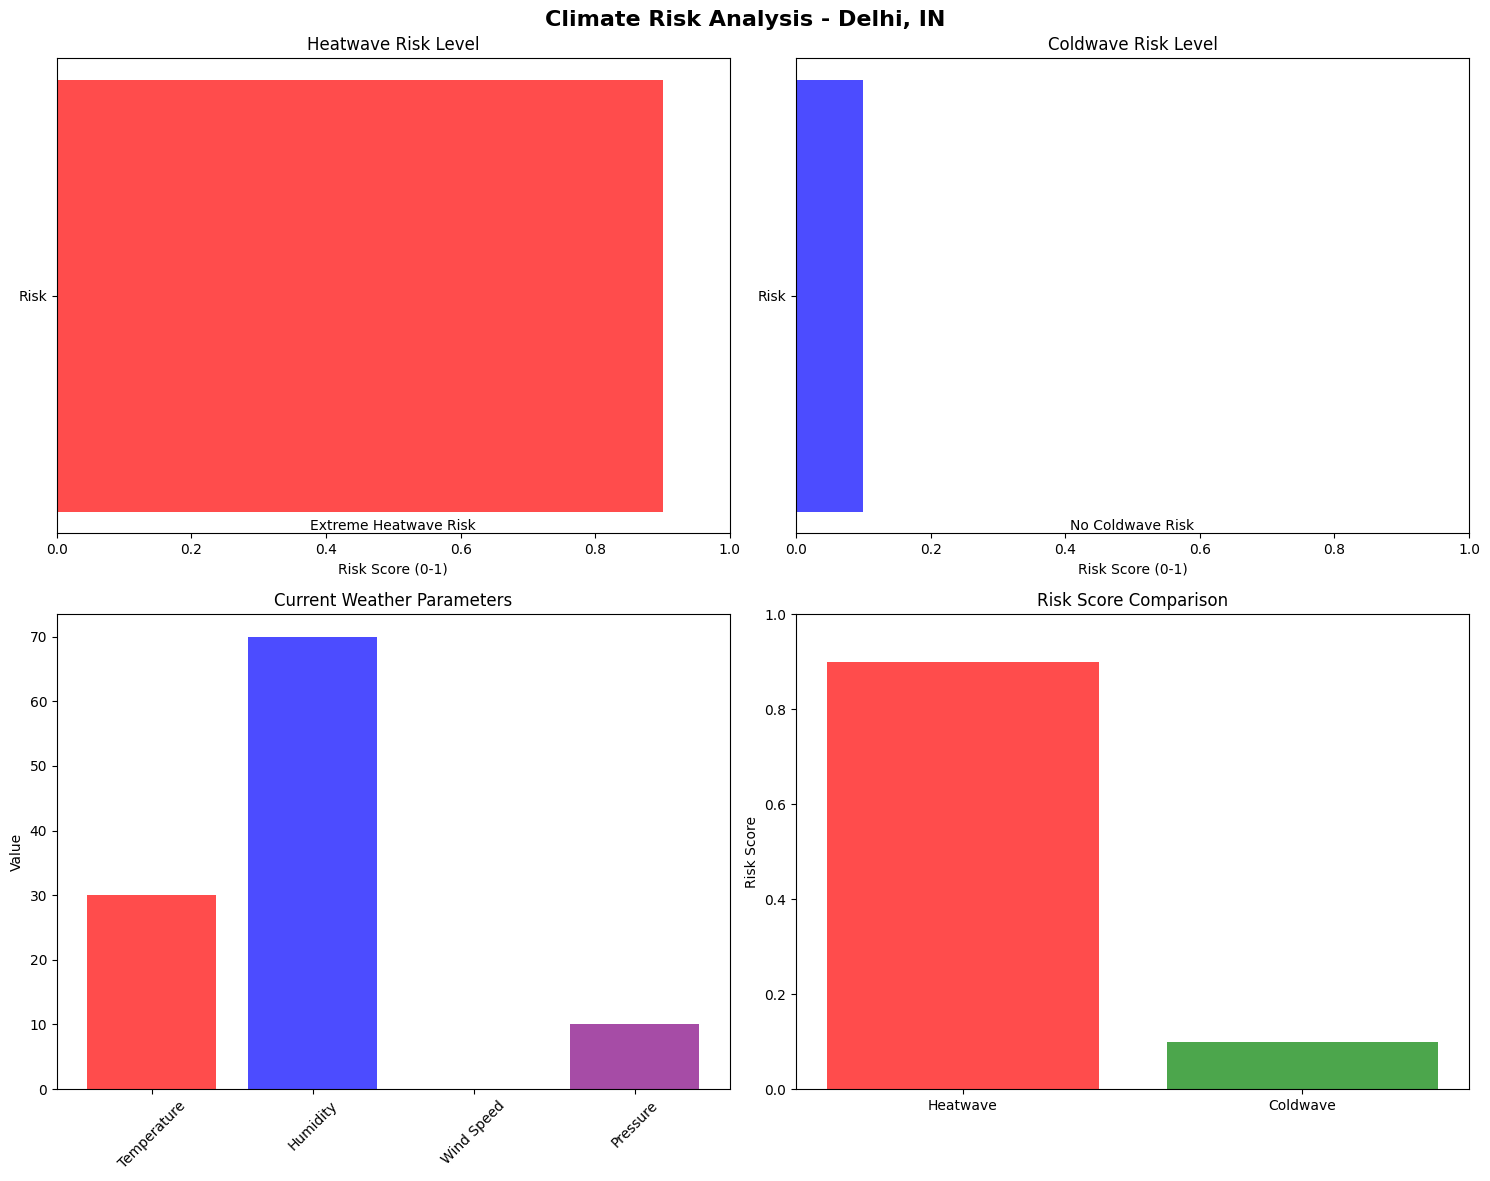

Results saved to climate_risk_report.csv
Sample Historical Data:
                        date  temperature   humidity  wind_speed
0 2025-08-15 18:01:53.332262     9.329320  79.010322   18.472847
1 2025-08-16 18:01:53.332262    23.806546  67.186445   12.398938
2 2025-08-17 18:01:53.332262    13.354891  58.390860    4.381587
3 2025-08-18 18:01:53.332262     8.367066  69.683152    0.976477
4 2025-08-19 18:01:53.332262    10.342165  74.902977    1.279593


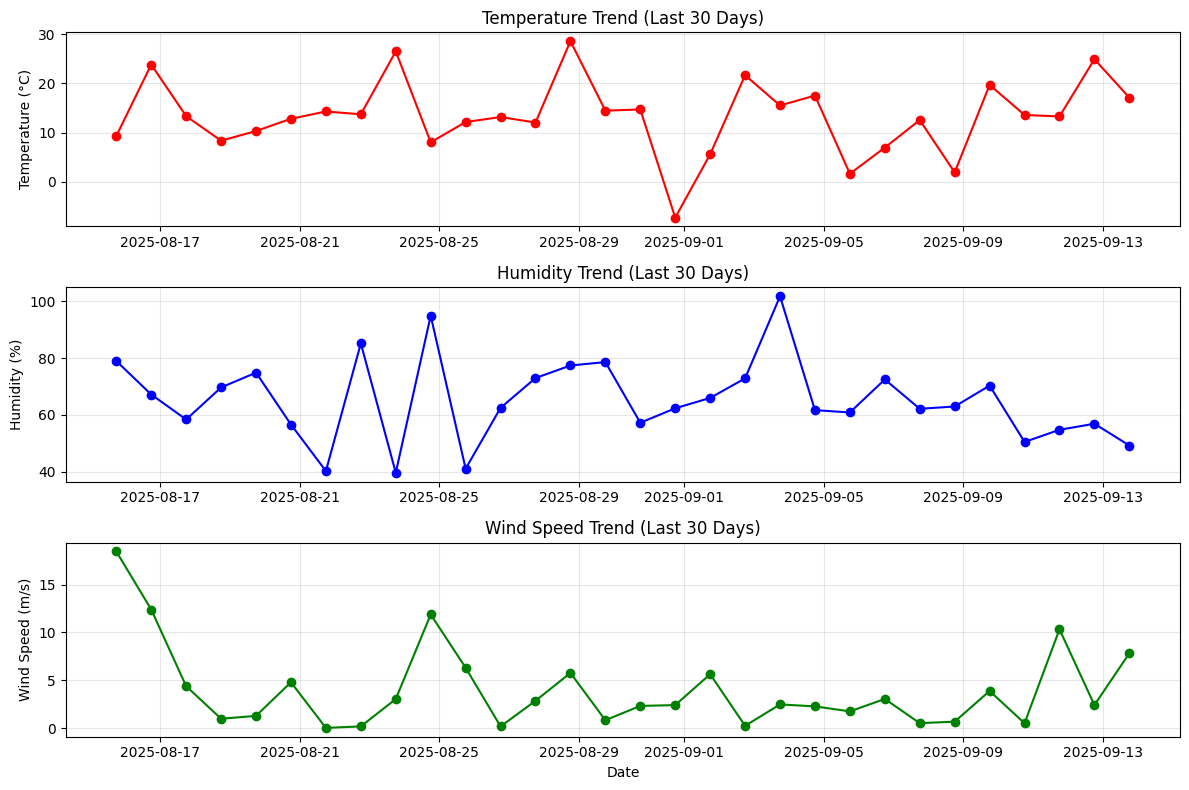

📋 Recommendations:
🔥 HEATWAVE ALERT:
   - Stay hydrated and avoid prolonged sun exposure
   - Wear light-colored, loose-fitting clothing
   - Limit outdoor activities during peak hours (11AM-3PM)
   - Check on vulnerable individuals (elderly, children)
📊 Risk Assessment Metrics:
Current Temperature: 30.1°C
30-day Average: 13.4°C
Temperature Anomaly: 2.20 standard deviations
⚠️  Significant temperature anomaly detected!


In [2]:
# %% [markdown]
# # Climate Risk Prediction Model
# 
# This model predicts heatwave and coldwave risks by analyzing current weather data from an API.

# %%
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# %%
# Configuration
API_KEY = "14c186bd667eaf67f12dbdc42b7a43ec"  # Replace with your OpenWeather API key
CITY = "Delhi"
COUNTRY_CODE = "IN"
BASE_URL = "http://api.openweathermap.org/data/2.5/weather"

# %%
class ClimateRiskPredictor:
    def __init__(self, api_key, city, country_code):
        self.api_key = api_key
        self.city = city
        self.country_code = country_code
        self.weather_data = None
        
    def fetch_weather_data(self):
        """Fetch current weather data from OpenWeather API"""
        try:
            params = {
                'q': f'{self.city},{self.country_code}',
                'appid': self.api_key,
                'units': 'metric'
            }
            
            response = requests.get(BASE_URL, params=params)
            response.raise_for_status()
            
            self.weather_data = response.json()
            return True
            
        except requests.exceptions.RequestException as e:
            print(f"Error fetching weather data: {e}")
            return False
    
    def extract_weather_features(self):
        """Extract relevant features from weather data"""
        if not self.weather_data:
            return None
            
        main = self.weather_data['main']
        weather = self.weather_data['weather'][0]
        wind = self.weather_data.get('wind', {})
        
        features = {
            'temperature': main['temp'],
            'feels_like': main['feels_like'],
            'temp_min': main['temp_min'],
            'temp_max': main['temp_max'],
            'humidity': main['humidity'],
            'pressure': main['pressure'],
            'wind_speed': wind.get('speed', 0),
            'wind_deg': wind.get('deg', 0),
            'cloudiness': self.weather_data.get('clouds', {}).get('all', 0),
            'weather_main': weather['main'],
            'weather_description': weather['description'],
            'visibility': self.weather_data.get('visibility', 0),
            'timestamp': datetime.fromtimestamp(self.weather_data['dt']),
            'city': self.city,
            'country': self.country_code
        }
        
        return features
    
    def calculate_heat_index(self, temperature, humidity):
        """Calculate heat index (feels-like temperature)"""
        # Simplified heat index calculation
        if temperature >= 27 and humidity >= 40:
            c1 = -8.78469475556
            c2 = 1.61139411
            c3 = 2.33854883889
            c4 = -0.14611605
            c5 = -0.012308094
            c6 = -0.0164248277778
            c7 = 0.002211732
            c8 = 0.00072546
            c9 = -0.000003582
            
            T = temperature
            R = humidity
            
            heat_index = (c1 + c2*T + c3*R + c4*T*R + c5*T**2 + 
                         c6*R**2 + c7*T**2*R + c8*T*R**2 + c9*T**2*R**2)
            return heat_index
        return temperature
    
    def predict_heatwave_risk(self, features):
        """Predict heatwave risk based on temperature thresholds"""
        temp = features['temperature']
        humidity = features['humidity']
        heat_index = self.calculate_heat_index(temp, humidity)
        
        # Risk thresholds (can be adjusted based on location and season)
        if heat_index >= 35:
            risk_level = "Extreme Heatwave Risk"
            risk_score = 0.9
        elif heat_index >= 32:
            risk_level = "High Heatwave Risk"
            risk_score = 0.7
        elif heat_index >= 30:
            risk_level = "Moderate Heatwave Risk"
            risk_score = 0.5
        elif heat_index >= 28:
            risk_level = "Low Heatwave Risk"
            risk_score = 0.3
        else:
            risk_level = "No Heatwave Risk"
            risk_score = 0.1
            
        return {
            'risk_type': 'heatwave',
            'risk_level': risk_level,
            'risk_score': risk_score,
            'current_temp': temp,
            'heat_index': heat_index,
            'humidity': humidity
        }
    
    def predict_coldwave_risk(self, features):
        """Predict coldwave risk based on temperature and wind chill"""
        temp = features['temperature']
        wind_speed = features['wind_speed']
        
        # Calculate wind chill (simplified)
        if temp <= 10 and wind_speed > 5:
            wind_chill = 13.12 + 0.6215*temp - 11.37*(wind_speed**0.16) + 0.3965*temp*(wind_speed**0.16)
        else:
            wind_chill = temp
        
        # Risk thresholds
        if wind_chill <= -10:
            risk_level = "Extreme Coldwave Risk"
            risk_score = 0.9
        elif wind_chill <= -5:
            risk_level = "High Coldwave Risk"
            risk_score = 0.7
        elif wind_chill <= 0:
            risk_level = "Moderate Coldwave Risk"
            risk_score = 0.5
        elif wind_chill <= 5:
            risk_level = "Low Coldwave Risk"
            risk_score = 0.3
        else:
            risk_level = "No Coldwave Risk"
            risk_score = 0.1
            
        return {
            'risk_type': 'coldwave',
            'risk_level': risk_level,
            'risk_score': risk_score,
            'current_temp': temp,
            'wind_chill': wind_chill,
            'wind_speed': wind_speed
        }
    
    def analyze_climate_risk(self):
        """Main method to analyze climate risks"""
        if not self.fetch_weather_data():
            return None
            
        features = self.extract_weather_features()
        if not features:
            return None
            
        heatwave_risk = self.predict_heatwave_risk(features)
        coldwave_risk = self.predict_coldwave_risk(features)
        
        return {
            'location': f"{self.city}, {self.country_code}",
            'timestamp': features['timestamp'],
            'weather_conditions': features['weather_description'],
            'heatwave_risk': heatwave_risk,
            'coldwave_risk': coldwave_risk,
            'raw_features': features
        }

# %%
# Initialize the predictor
predictor = ClimateRiskPredictor(API_KEY, CITY, COUNTRY_CODE)

# %%
# Analyze climate risk
risk_analysis = predictor.analyze_climate_risk()

if risk_analysis:
    print("🌤️ Climate Risk Analysis Results")
    print("=" * 50)
    print(f"Location: {risk_analysis['location']}")
    print(f"Time: {risk_analysis['timestamp']}")
    print(f"Weather: {risk_analysis['weather_conditions']}")
    print("\n" + "=" * 50)
    
    # Heatwave results
    hw = risk_analysis['heatwave_risk']
    print(f"🔥 Heatwave Risk: {hw['risk_level']} (Score: {hw['risk_score']:.2f})")
    print(f"   Temperature: {hw['current_temp']:.1f}°C")
    print(f"   Heat Index: {hw['heat_index']:.1f}°C")
    print(f"   Humidity: {hw['humidity']}%")
    
    # Coldwave results
    cw = risk_analysis['coldwave_risk']
    print(f"❄️  Coldwave Risk: {cw['risk_level']} (Score: {cw['risk_score']:.2f})")
    print(f"   Temperature: {cw['current_temp']:.1f}°C")
    print(f"   Wind Chill: {cw['wind_chill']:.1f}°C")
    print(f"   Wind Speed: {cw['wind_speed']} m/s")
else:
    print("Failed to fetch weather data. Please check your API key and internet connection.")

# %%
# Visualization function
def plot_risk_analysis(risk_analysis):
    """Create visualizations for the risk analysis"""
    if not risk_analysis:
        return
    
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))
    fig.suptitle(f'Climate Risk Analysis - {risk_analysis["location"]}', fontsize=16, fontweight='bold')
    
    # Temperature gauges
    hw_risk = risk_analysis['heatwave_risk']
    cw_risk = risk_analysis['coldwave_risk']
    features = risk_analysis['raw_features']
    
    # Heatwave risk gauge
    ax1.set_title('Heatwave Risk Level')
    ax1.barh(['Risk'], [hw_risk['risk_score']], color='red', alpha=0.7)
    ax1.set_xlim(0, 1)
    ax1.set_xlabel('Risk Score (0-1)')
    ax1.text(0.5, 0, hw_risk['risk_level'], ha='center', va='bottom', transform=ax1.transAxes)
    
    # Coldwave risk gauge
    ax2.set_title('Coldwave Risk Level')
    ax2.barh(['Risk'], [cw_risk['risk_score']], color='blue', alpha=0.7)
    ax2.set_xlim(0, 1)
    ax2.set_xlabel('Risk Score (0-1)')
    ax2.text(0.5, 0, cw_risk['risk_level'], ha='center', va='bottom', transform=ax2.transAxes)
    
    # Weather parameters
    weather_params = ['Temperature', 'Humidity', 'Wind Speed', 'Pressure']
    values = [features['temperature'], features['humidity'], 
              features['wind_speed'], features['pressure']/100]  # Convert pressure to hPa
    
    colors = ['red', 'blue', 'green', 'purple']
    ax3.bar(weather_params, values, color=colors, alpha=0.7)
    ax3.set_title('Current Weather Parameters')
    ax3.set_ylabel('Value')
    ax3.tick_params(axis='x', rotation=45)
    
    # Risk comparison
    risks = ['Heatwave', 'Coldwave']
    scores = [hw_risk['risk_score'], cw_risk['risk_score']]
    colors = ['red' if score > 0.5 else 'orange' if score > 0.3 else 'green' for score in scores]
    
    ax4.bar(risks, scores, color=colors, alpha=0.7)
    ax4.set_title('Risk Score Comparison')
    ax4.set_ylabel('Risk Score')
    ax4.set_ylim(0, 1)
    
    plt.tight_layout()
    plt.show()

# %%
# Generate visualizations
if risk_analysis:
    plot_risk_analysis(risk_analysis)

# %%
# Advanced risk analysis with multiple cities
def analyze_multiple_cities(cities_data, api_key):
    """Analyze climate risk for multiple cities"""
    results = []
    
    for city, country in cities_data:
        predictor = ClimateRiskPredictor(api_key, city, country)
        analysis = predictor.analyze_climate_risk()
        
        if analysis:
            results.append({
                'city': city,
                'country': country,
                'temperature': analysis['raw_features']['temperature'],
                'heatwave_risk': analysis['heatwave_risk']['risk_score'],
                'coldwave_risk': analysis['coldwave_risk']['risk_score'],
                'overall_risk': max(analysis['heatwave_risk']['risk_score'], 
                                  analysis['coldwave_risk']['risk_score'])
            })
    
    return pd.DataFrame(results)

# %%
# Example: Analyze multiple cities (commented out to avoid API calls)
# multiple_cities = [
#     ('London', 'UK'),
#     ('New York', 'US'),
#     ('Tokyo', 'JP'),
#     ('Sydney', 'AU'),
#     ('Moscow', 'RU')
# ]

# multi_city_results = analyze_multiple_cities(multiple_cities, API_KEY)
# print("\nMulti-City Risk Analysis:")
# print(multi_city_results)

# %%
# Save results to CSV
def save_results(risk_analysis, filename='climate_risk_report.csv'):
    """Save risk analysis results to CSV"""
    if not risk_analysis:
        return
    
    data = {
        'timestamp': [risk_analysis['timestamp']],
        'location': [risk_analysis['location']],
        'temperature': [risk_analysis['raw_features']['temperature']],
        'humidity': [risk_analysis['raw_features']['humidity']],
        'wind_speed': [risk_analysis['raw_features']['wind_speed']],
        'heatwave_risk_score': [risk_analysis['heatwave_risk']['risk_score']],
        'heatwave_risk_level': [risk_analysis['heatwave_risk']['risk_level']],
        'coldwave_risk_score': [risk_analysis['coldwave_risk']['risk_score']],
        'coldwave_risk_level': [risk_analysis['coldwave_risk']['risk_level']],
        'weather_conditions': [risk_analysis['weather_conditions']]
    }
    
    df = pd.DataFrame(data)
    df.to_csv(filename, index=False)
    print(f"Results saved to {filename}")

# %%
# Save results
if risk_analysis:
    save_results(risk_analysis)

# %%
# Historical data simulation (for demonstration purposes)
def generate_historical_data():
    """Generate simulated historical data for analysis"""
    dates = pd.date_range(end=datetime.now(), periods=30, freq='D')
    data = {
        'date': dates,
        'temperature': np.random.normal(15, 8, 30),  # Mean 15°C, std 8°C
        'humidity': np.random.normal(65, 15, 30),    # Mean 65%, std 15%
        'wind_speed': np.random.exponential(3, 30)   # Exponential distribution
    }
    
    df = pd.DataFrame(data)
    return df

# %%
# Generate and display historical data
historical_data = generate_historical_data()
print("Sample Historical Data:")
print(historical_data.head())

# %%
# Plot historical trends
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(historical_data['date'], historical_data['temperature'], 'r-', marker='o')
plt.title('Temperature Trend (Last 30 Days)')
plt.ylabel('Temperature (°C)')
plt.grid(True, alpha=0.3)

plt.subplot(3, 1, 2)
plt.plot(historical_data['date'], historical_data['humidity'], 'b-', marker='o')
plt.title('Humidity Trend (Last 30 Days)')
plt.ylabel('Humidity (%)')
plt.grid(True, alpha=0.3)

plt.subplot(3, 1, 3)
plt.plot(historical_data['date'], historical_data['wind_speed'], 'g-', marker='o')
plt.title('Wind Speed Trend (Last 30 Days)')
plt.ylabel('Wind Speed (m/s)')
plt.xlabel('Date')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# %%
# Risk assessment recommendations
def generate_recommendations(risk_analysis):
    """Generate recommendations based on risk assessment"""
    if not risk_analysis:
        return
    
    hw_risk = risk_analysis['heatwave_risk']
    cw_risk = risk_analysis['coldwave_risk']
    
    print("📋 Recommendations:")
    print("=" * 50)
    
    if hw_risk['risk_score'] >= 0.5:
        print("🔥 HEATWAVE ALERT:")
        print("   - Stay hydrated and avoid prolonged sun exposure")
        print("   - Wear light-colored, loose-fitting clothing")
        print("   - Limit outdoor activities during peak hours (11AM-3PM)")
        print("   - Check on vulnerable individuals (elderly, children)")
        
    if cw_risk['risk_score'] >= 0.5:
        print("❄️  COLDWAVE ALERT:")
        print("   - Dress in layers to maintain body heat")
        print("   - Limit time outdoors in extreme cold")
        print("   - Watch for signs of frostbite and hypothermia")
        print("   - Ensure heating systems are functioning properly")
        
    if hw_risk['risk_score'] < 0.5 and cw_risk['risk_score'] < 0.5:
        print("✅ Conditions are normal")
        print("   - No special precautions needed")
        print("   - Enjoy the comfortable weather!")
    
    print("=" * 50)

# %%
# Generate recommendations
if risk_analysis:
    generate_recommendations(risk_analysis)

# %%
# Model evaluation metrics (simplified)
def calculate_risk_metrics(historical_data, current_analysis):
    """Calculate risk assessment metrics"""
    if not current_analysis:
        return
    
    current_temp = current_analysis['raw_features']['temperature']
    avg_temp = historical_data['temperature'].mean()
    std_temp = historical_data['temperature'].std()
    
    # Calculate temperature anomaly
    temp_anomaly = (current_temp - avg_temp) / std_temp
    
    print("📊 Risk Assessment Metrics:")
    print("=" * 40)
    print(f"Current Temperature: {current_temp:.1f}°C")
    print(f"30-day Average: {avg_temp:.1f}°C")
    print(f"Temperature Anomaly: {temp_anomaly:.2f} standard deviations")
    
    if abs(temp_anomaly) > 2:
        print("⚠️  Significant temperature anomaly detected!")
    elif abs(temp_anomaly) > 1:
        print("ℹ️  Moderate temperature anomaly")
    else:
        print("✅ Temperature within normal range")

# %%
# Calculate metrics
if risk_analysis:
    calculate_risk_metrics(historical_data, risk_analysis)